In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from scipy.stats import skew
import seaborn as sns
import os


In [24]:
#data = pd.read_csv('/Users/psehgal/dev/airflow_home/kaggleatpdata.csv', dtype='unicode')
data = pd.read_csv('/Users/psehgal/dev/airflow_home/kaggleatpdata.csv', encoding = 'ISO-8859-1')

In [25]:
data

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Escude N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46647,54,St. Petersburg,St. Petersburg Open,23/09/2016,ATP250,Indoor,Hard,Quarterfinals,3,Zverev A.,...,NaN,NaN,1.57,2.38,NaN,NaN,1.66,2.45,1.60,2.30
46648,54,St. Petersburg,St. Petersburg Open,23/09/2016,ATP250,Indoor,Hard,Quarterfinals,3,Wawrinka S.,...,NaN,NaN,1.22,4.33,NaN,NaN,1.24,4.91,1.21,4.34
46649,54,St. Petersburg,St. Petersburg Open,24/09/2016,ATP250,Indoor,Hard,Semifinals,3,Zverev A.,...,NaN,NaN,2.38,1.57,NaN,NaN,3.12,1.57,2.68,1.46
46650,54,St. Petersburg,St. Petersburg Open,24/09/2016,ATP250,Indoor,Hard,Semifinals,3,Wawrinka S.,...,NaN,NaN,1.33,3.40,NaN,NaN,1.41,3.80,1.31,3.40


In [27]:
data.Series.unique()

array(['International', 'Grand Slam', 'International Gold', 'Masters',
       'Masters Cup', 'International Series', 'ATP250', 'ATP500',
       'Masters 1000'], dtype=object)

In [29]:
# Best 10 players on clay, grass, and hard surfaces

In [30]:
# df with column names
surface = data[['Surface', 'Winner', 'Loser']]

In [31]:
surface.shape

(46652, 3)

In [32]:
# create 2 df for winner and looser and change the column names to player
surface_w = surface[['Surface', 'Winner']]
surface_l = surface[['Surface', 'Loser']]
surface_w.columns = ['Surface', 'Player']
surface_l.columns = ['Surface', 'Player']

In [33]:
# add 1 more column to the df and fill with sequential nums from 1 to length of df
surface_w['idx'] = range(1, len(surface_w) + 1)
surface_l['idx'] = range(1, len(surface_l) + 1)

In [34]:
# count the num of winning matches for every surface and player combination 
surface_w = surface_w.groupby(['Surface', 'Player']).count()
surface_w = surface_w.reset_index()
surface_w.columns = ['Surface', 'Player', 'Count_Win']


In [35]:
# count the num of lost matches for every surface and player combination
surface_l = surface_l.groupby(['Surface', 'Player']).count()
surface_l = surface_l.reset_index()
surface_l.columns = ['Surface', 'Player', 'Count_Lose']

In [36]:
surface = pd.merge(surface_w, surface_l, on=['Surface', 'Player'])

In [37]:
surface['total_play'] = surface['Count_Win'] + surface['Count_Lose']

In [38]:
surface['perc_win'] = round(surface['Count_Win'] / surface['total_play'],4)*100

In [39]:
surface = surface[surface.total_play > 50]

In [40]:
surface.sort_values(by='perc_win', ascending=False).head(30)

,Surface,Player,Count_Win,Count_Lose,total_play,perc_win
1468,Hard,Federer R.,622,1,623,99.84
1435,Hard,Djokovic N.,469,1,470,99.79
1802,Hard,Roddick A.,402,1,403,99.75
1717,Hard,Murray A.,369,1,370,99.73
1719,Hard,Nadal R.,363,1,364,99.73
612,Clay,Nadal R.,351,1,352,99.72
1339,Hard,Berdych T.,334,1,335,99.70
1550,Hard,Hewitt L.,324,1,325,99.69
1471,Hard,Ferrer D.,310,1,311,99.68
384,Clay,Ferrer D.,293,1,294,99.66


In [41]:
surface.Surface.unique()

array(['Clay', 'Grass', 'Hard'], dtype=object)

In [42]:
# Best players on Clay

top_Clay = surface[surface.Surface == 'Clay'].sort_values(by='perc_win', ascending = False).head(10)

Text(0.5, 1, 'Best players on Clay')

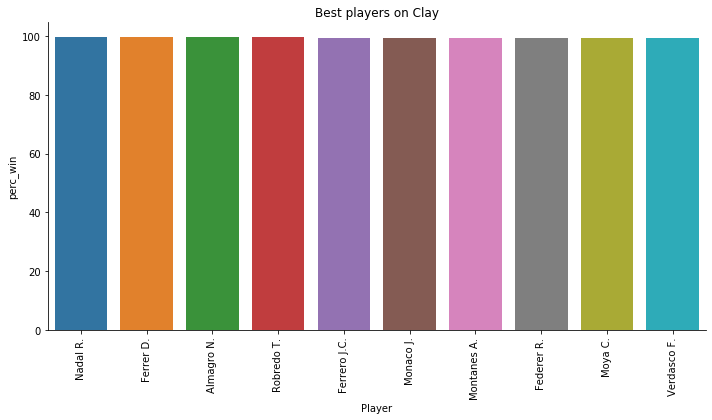

In [43]:
# plot the graph
g=sns.catplot(x='Player', y='perc_win', data=top_Clay, kind='bar', size=5, aspect=2)
g.set_xticklabels(labels = top_Clay.Player,  rotation=90)
plt.title('Best players on Clay')

In [44]:
# Best player on Grass

top_Grass = surface[surface.Surface == 'Grass'].sort_values(by='perc_win', ascending = False).head(10)

Text(0.5, 1, 'Best players on Grass')

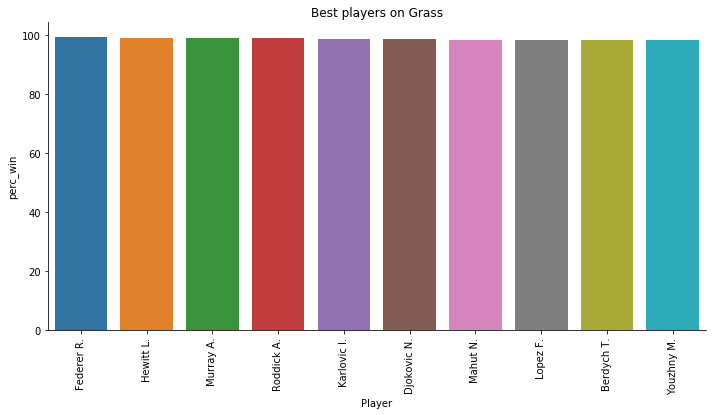

In [50]:
# plot the graph
g=sns.catplot(x='Player', y='perc_win', data=top_Grass, kind='bar', size=5, aspect=2)
g.set_xticklabels(labels = top_Grass.Player,  rotation=90)
plt.title('Best players on Grass')

In [46]:
# Best players on Hard surface

top_Hard = surface[surface.Surface == 'Hard'].sort_values(by='perc_win', ascending = False).head(10)

Text(0.5, 1, 'Best players on Hard Surface')

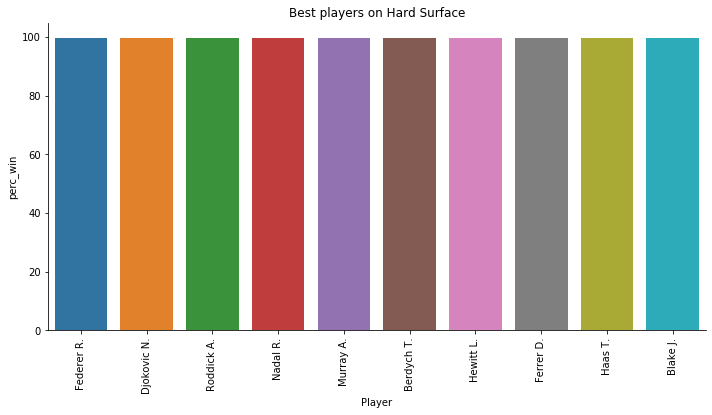

In [48]:
# plot the graph
g=sns.catplot(x='Player', y='perc_win', data=top_Hard, kind='bar', size=5, aspect=2)
g.set_xticklabels(labels = top_Hard.Player,  rotation=90)
plt.title('Best players on Hard Surface')